In [3]:
def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

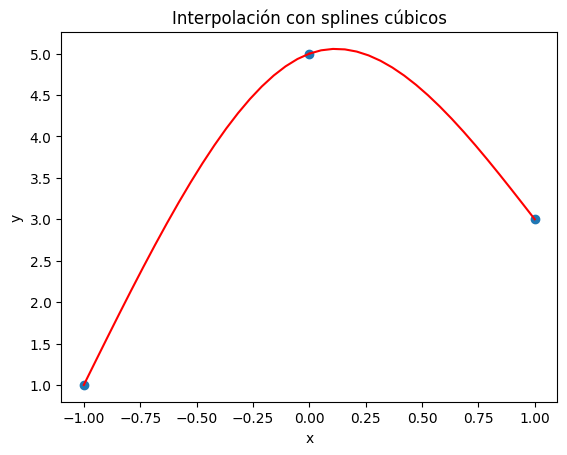

In [4]:
import matplotlib.pyplot as plt
import numpy as np

xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 5.5, "c": 0, "d": -1.5},
    {"a": 5, "b": 1, "c": -4.5, "d": 1.5},
]
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="red")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos")
plt.show()

Tarea
Grafique los splines cúbicos tal que cumplan con una pendiente de 
 en los puntos dados. m=-3

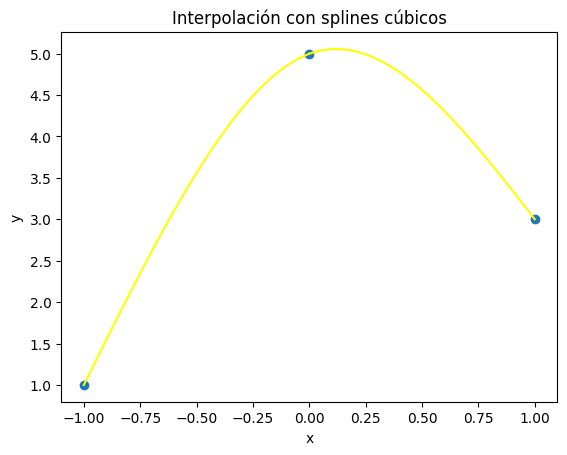

In [5]:
xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 5.5, "c": 0, "d": -1.5},
    {"a": 5, "b": 1, "c": -4.5, "d": 1.5},
]
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="yellow")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos")
plt.show()

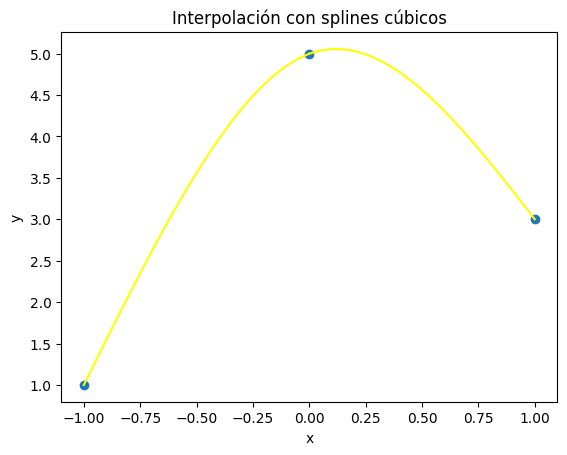

In [6]:
import matplotlib.pyplot as plt
import numpy as np

xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 5.5, "c": 0, "d": -1.5},
    {"a": 5, "b": 1, "c": -4.5, "d": 1.5},
]
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="yellow")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos")
plt.show()

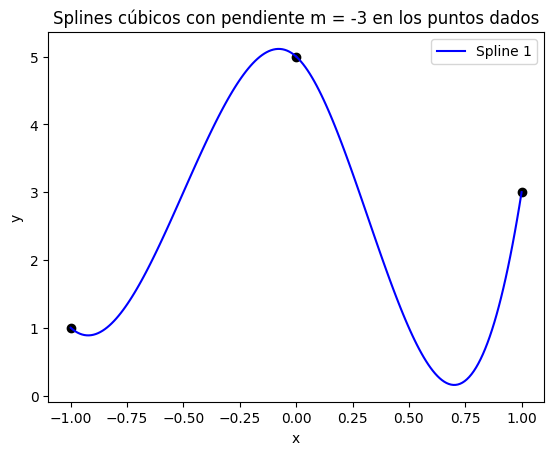

In [ ]:
from sympy import symbols, Eq, solve

a0, b0, c0, d0, a1, b1, c1, d1 = symbols('a0 b0 c0 d0 a1 b1 c1 d1')

eqs = [
    Eq(a0, ys[0]),  
    Eq(a0 + b0*1 + c0*1**2 + d0*1**3, ys[1]),  
    Eq(a1, ys[1]),  
    Eq(a1 + b1*1 + c1*1**2 + d1*1**3, ys[2]),  
    Eq(b0, -3),  
    Eq(b1, -3),  
    Eq(b0 + 2*c0*1 + 3*d0*1**2, b1), 
    Eq(2*c0 + 6*d0*1, 2*c1)  
]

sol = solve(eqs, (a0, b0, c0, d0, a1, b1, c1, d1))

# Extraemos los nuevos parámetros
s_new = [
    {"a": float(sol[a0]), "b": float(sol[b0]), "c": float(sol[c0]), "d": float(sol[d0])},
    {"a": float(sol[a1]), "b": float(sol[b1]), "c": float(sol[c1]), "d": float(sol[d1])},
]

# Graficas
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 100)
    _y = Spline(_x, x_i, s_new[i])
    plt.plot(_x, _y, color="blue", label=f"Spline {i+1}" if i == 0 else None)

plt.scatter(xs, ys, color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Splines cúbicos con pendiente m = -3 en los puntos dados")
plt.legend()
plt.show()

In [8]:
from sympy import pprint

# Mostrar las ecuaciones 
x, x0 = symbols('x x0')

for idx, coef in enumerate(s_new):
    spline_eq = coef["a"] + coef["b"] * (x - xs[idx]) + coef["c"] * (x - xs[idx])**2 + coef["d"] * (x - xs[idx])**3
    print(f"Spline {idx+1} para x en [{xs[idx]}, {xs[idx+1]}]:")
    pprint(spline_eq, use_unicode=True)
    print()

Spline 1 para x en [-1, 0]:
                     3               2      
-3.0⋅x - 14.0⋅(x + 1)  + 21.0⋅(x + 1)  - 2.0

Spline 2 para x en [0, 1]:
      3         2              
22.0⋅x  - 21.0⋅x  - 3.0⋅x + 5.0

